In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("style.mplstyle")

In [2]:
df = pd.read_parquet("results.parquet")
df

,factor,holding_period,cut_off,realized_return_date,side,return
0,factor_1,1,0.05,2016-03-02,long,0.012724
1,factor_1,1,0.05,2016-03-02,short,-0.014056
2,factor_1,1,0.05,2016-03-03,long,0.006367
3,factor_1,1,0.05,2016-03-03,short,-0.015051
4,factor_1,1,0.05,2016-03-04,long,0.004394
...,...,...,...,...,...,...
384955,factor_3,80,0.20,2022-01-10,short,-0.045816
384956,factor_3,80,0.20,2022-01-11,long,0.092658
384957,factor_3,80,0.20,2022-01-11,short,-0.078080
384958,factor_3,80,0.20,2022-01-12,long,0.088462


We are interested in picking the strategy with the best factor, the best holding period, the best cut off, and the best side.

What's the best way to visualize all of this?

In [3]:
df.groupby(["factor", "holding_period", "cut_off", "side"])["return"].sum()


factor    holding_period  cut_off  side 
factor_1  1               0.05     long     -0.058823
                                   short    -0.553539
                          0.10     long      0.017276
                                   short    -0.469923
                          0.15     long      0.113814
                                              ...    
factor_3  80              0.10     short   -69.261889
                          0.15     long     71.119369
                                   short   -71.964852
                          0.20     long     67.996705
                                   short   -70.962937
Name: return, Length: 264, dtype: float64

In [4]:
long_10_day = (
    df.loc[df.holding_period.eq(10) & df.side.eq("long")]
    .pivot_table(
        index="realized_return_date",
        values="return",
        columns=["factor", "cut_off"],
    )
    .cumsum()
    .unstack()
    .rename("cum_return")
    .reset_index()
)
long_10_day


,factor,cut_off,realized_return_date,cum_return
0,factor_1,0.05,2016-03-15,0.029463
1,factor_1,0.05,2016-03-16,0.060064
2,factor_1,0.05,2016-03-17,0.093248
3,factor_1,0.05,2016-03-18,0.131966
4,factor_1,0.05,2016-03-21,0.170080
...,...,...,...,...
17635,factor_3,0.20,2022-01-06,9.412171
17636,factor_3,0.20,2022-01-07,9.424272
17637,factor_3,0.20,2022-01-10,9.415527
17638,factor_3,0.20,2022-01-11,9.409964


Text(0.5, 1.0, '10 Day Holding Period')

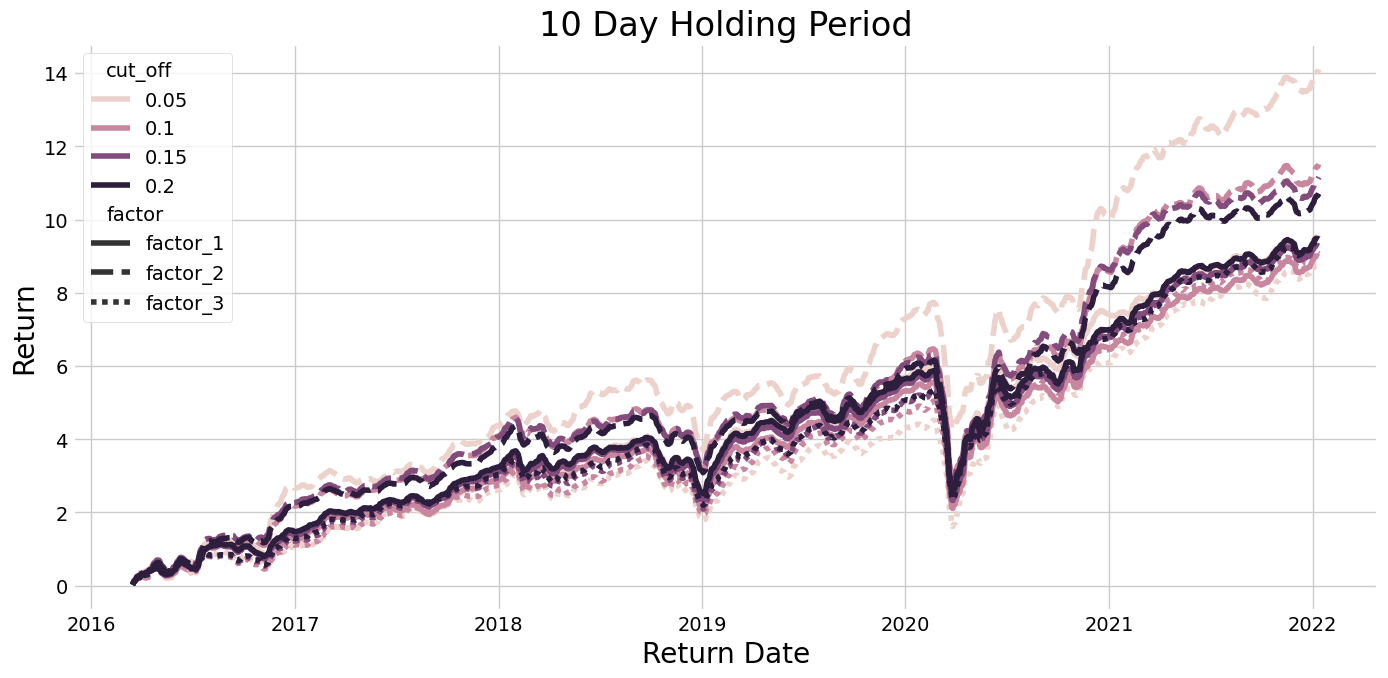

In [5]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(
    ax=ax,
    data=long_10_day,
    x="realized_return_date",
    y="cum_return",
    hue="cut_off",
    style="factor",
)
ax.set_xlabel("Return Date")
ax.set_ylabel("Return")
ax.set_title("10 Day Holding Period")

In [10]:
def plot_holding_period_returns(df: pd.DataFrame, period: int):
    wide_version = (
        df.loc[df.holding_period.eq(period) & df.side.eq("long")]
        .pivot_table(
            index="realized_return_date",
            values="return",
            columns=["factor", "cut_off"],
        )
        .cumsum()
        .unstack()
        .rename("cum_return")
        .reset_index()
    )

    fig, ax = plt.subplots(figsize=(15, 7))
    sns.lineplot(
        ax=ax,
        data=wide_version,
        x="realized_return_date",
        y="cum_return",
        hue="cut_off",
        style="factor",
    )
    ax.set_xlabel("Return Date")
    ax.set_ylabel("Return")
    ax.set_title(f"{period} Day Holding Period") 
    fig.savefig(f"plots/Long_{period}_day_holding_period.png")   


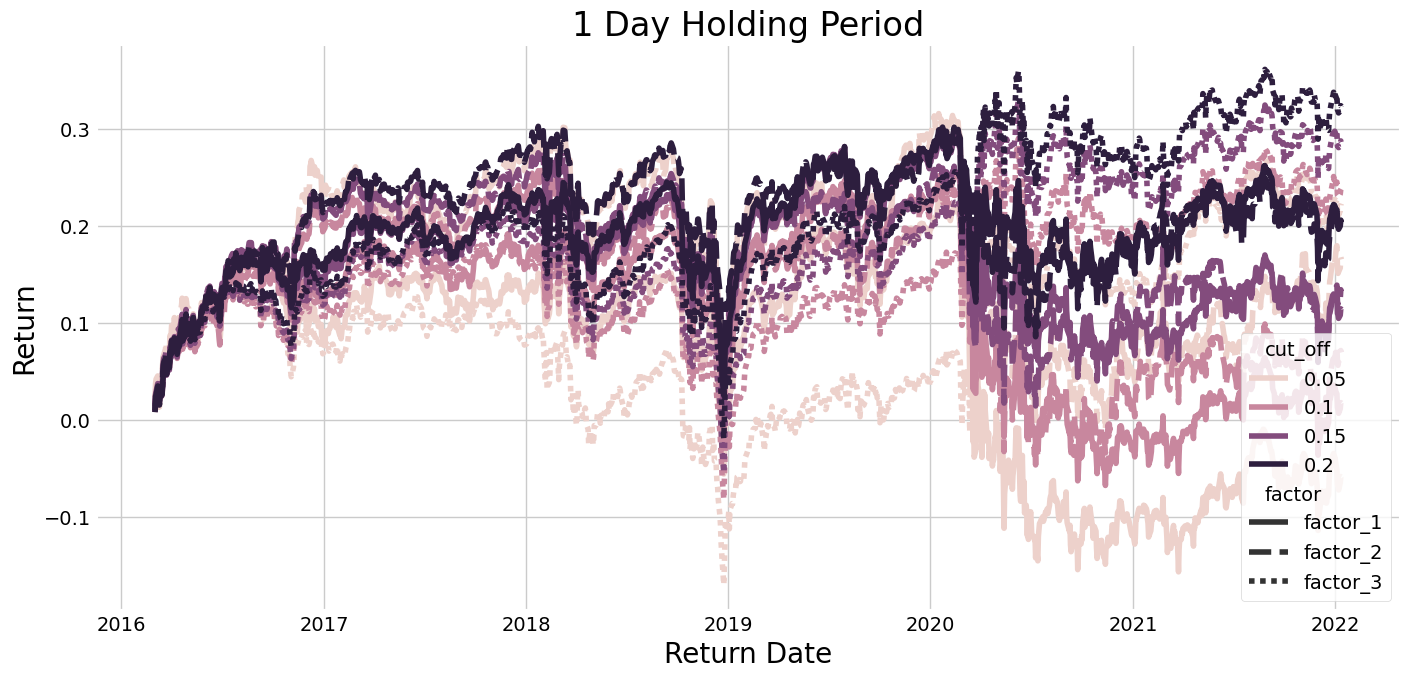

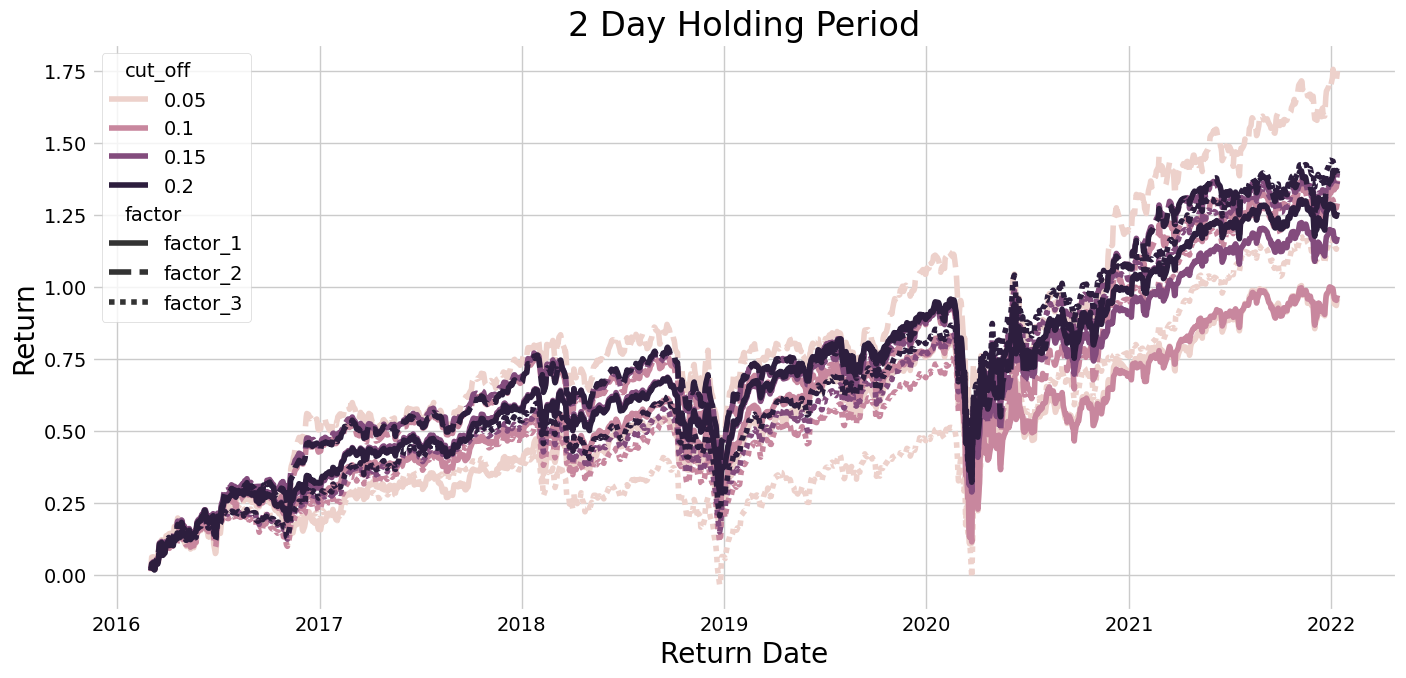

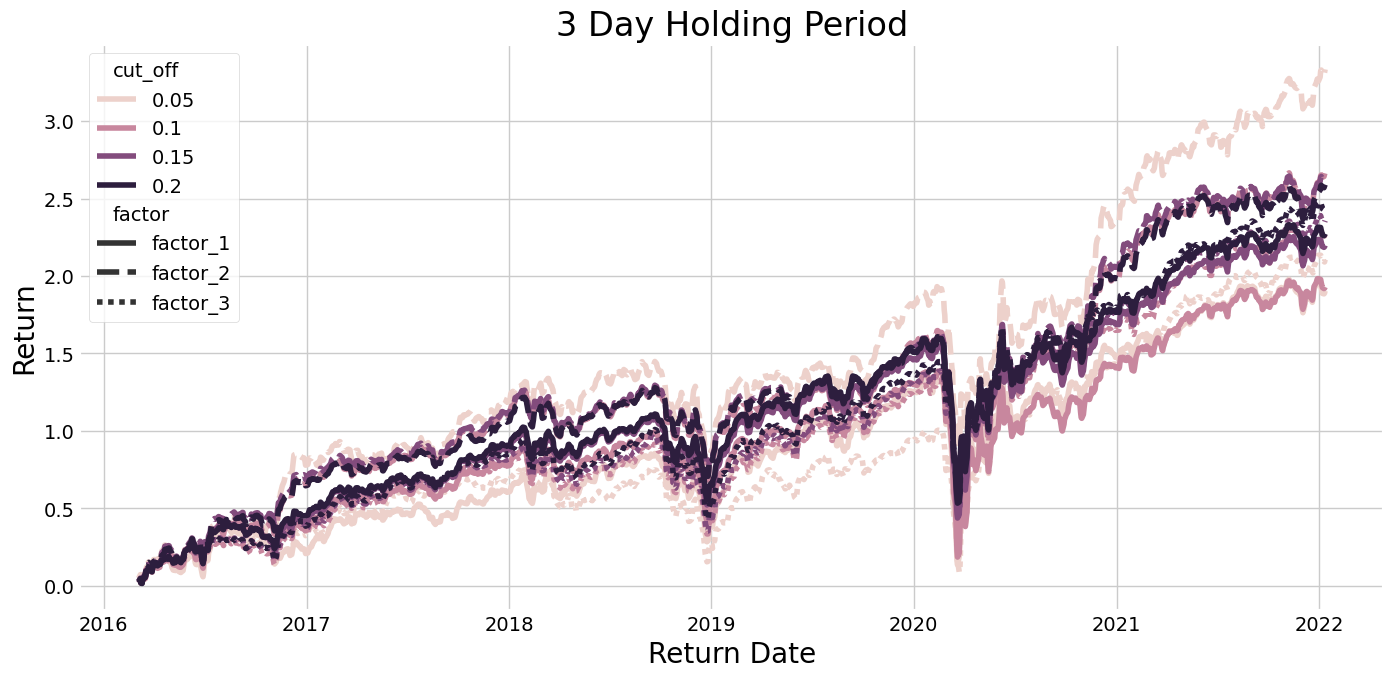

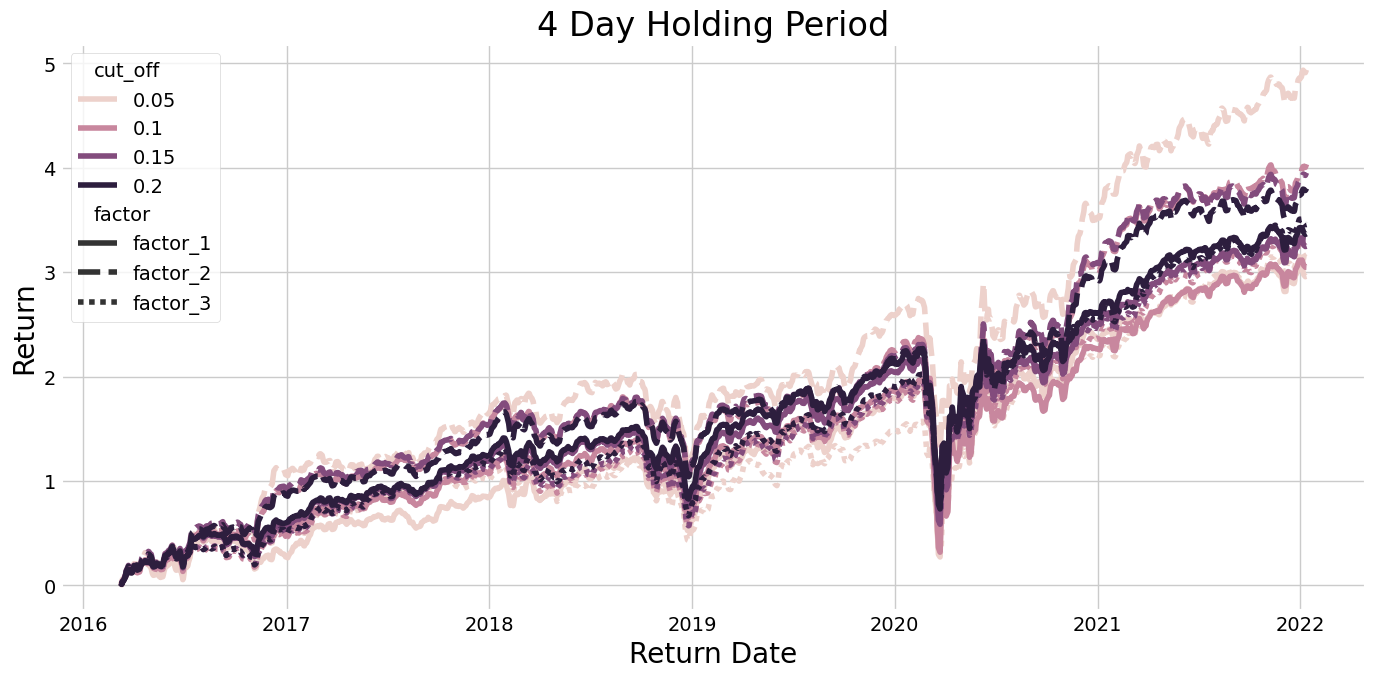

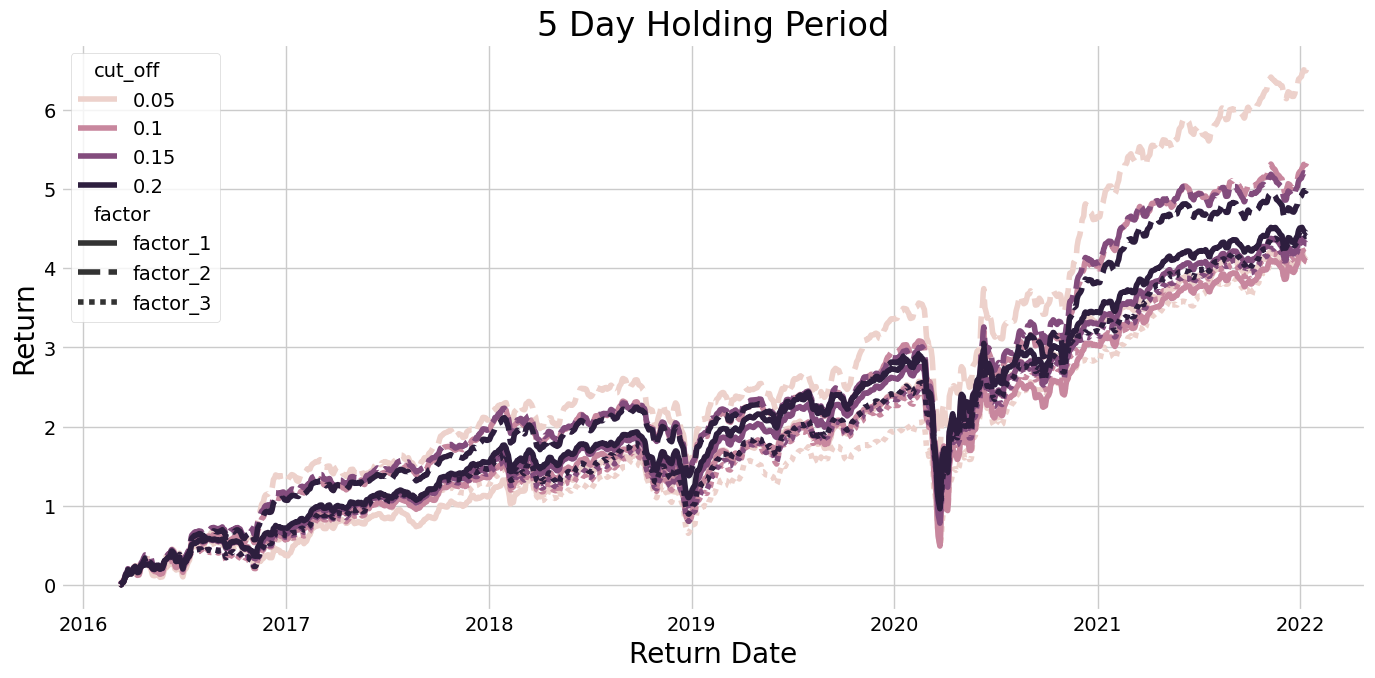

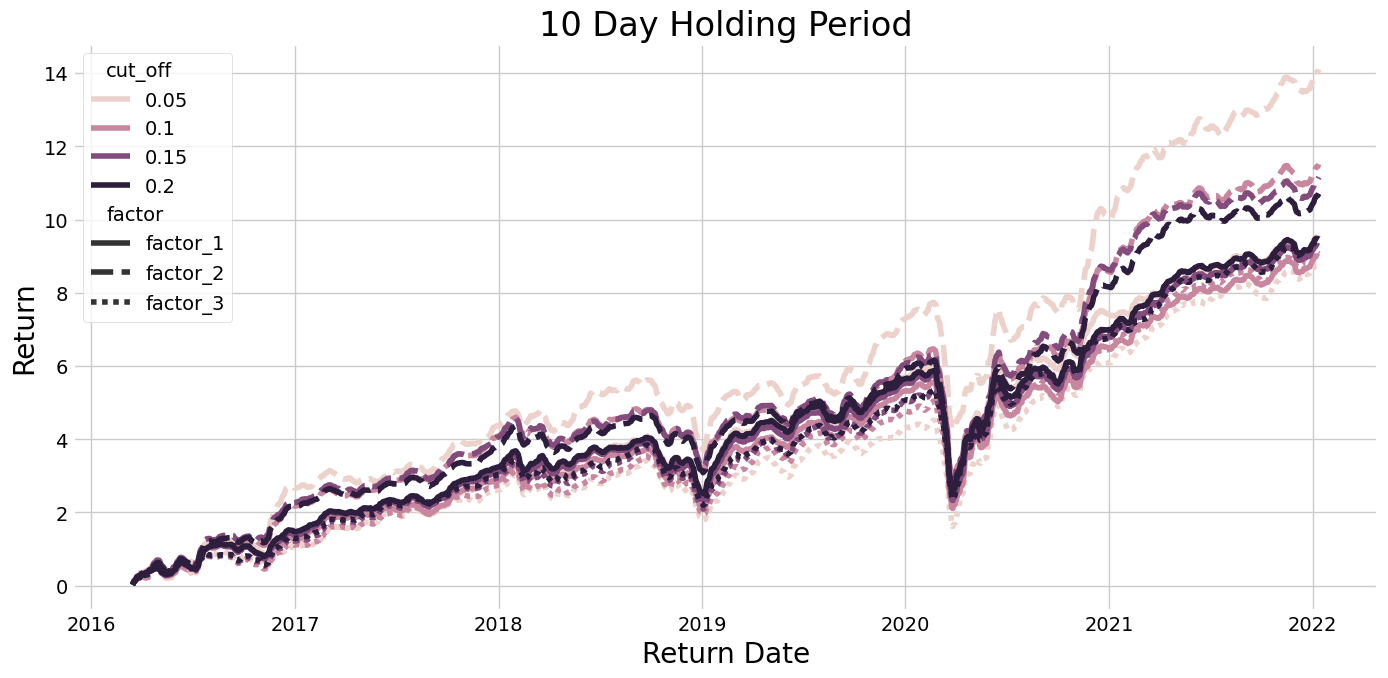

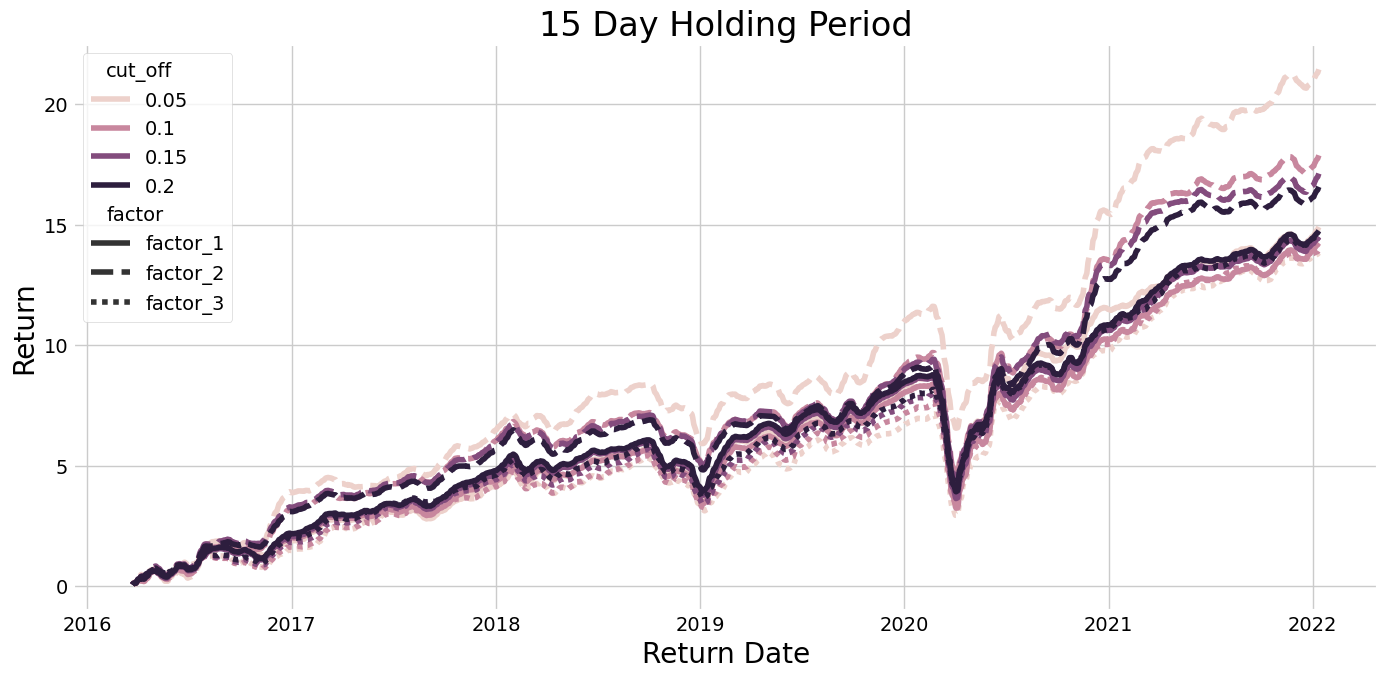

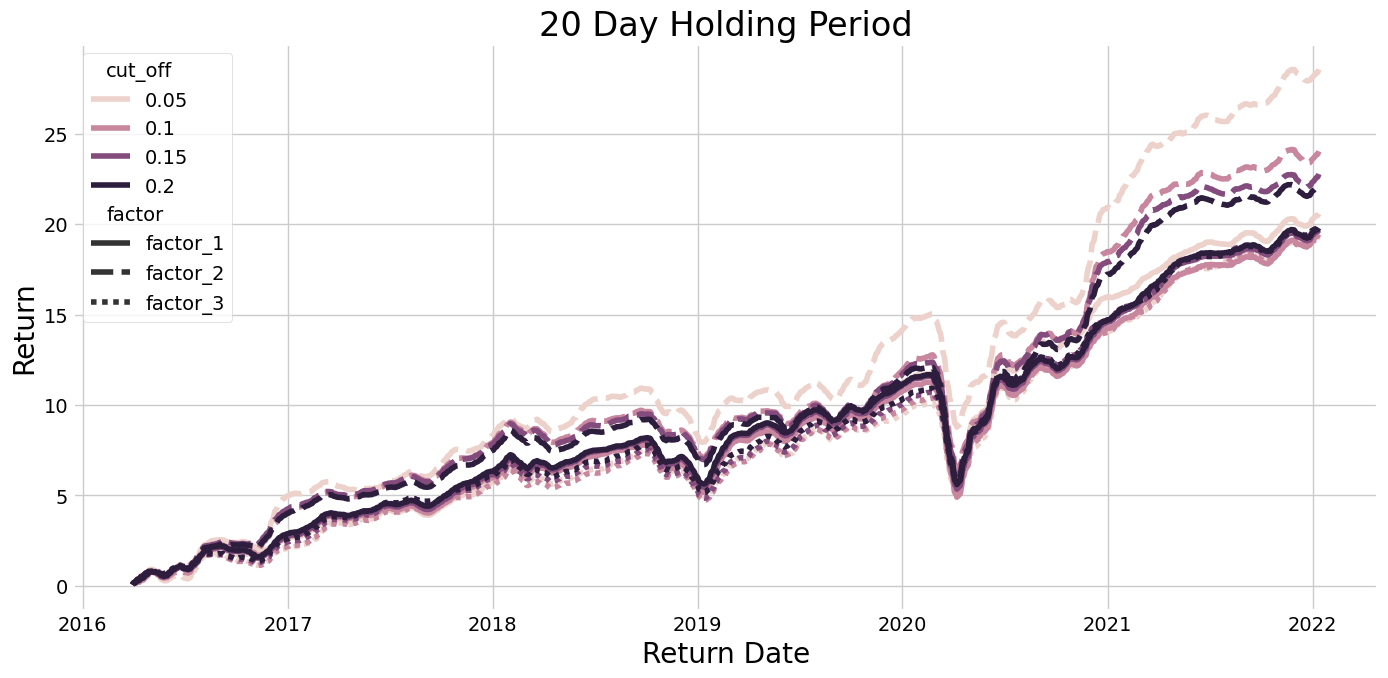

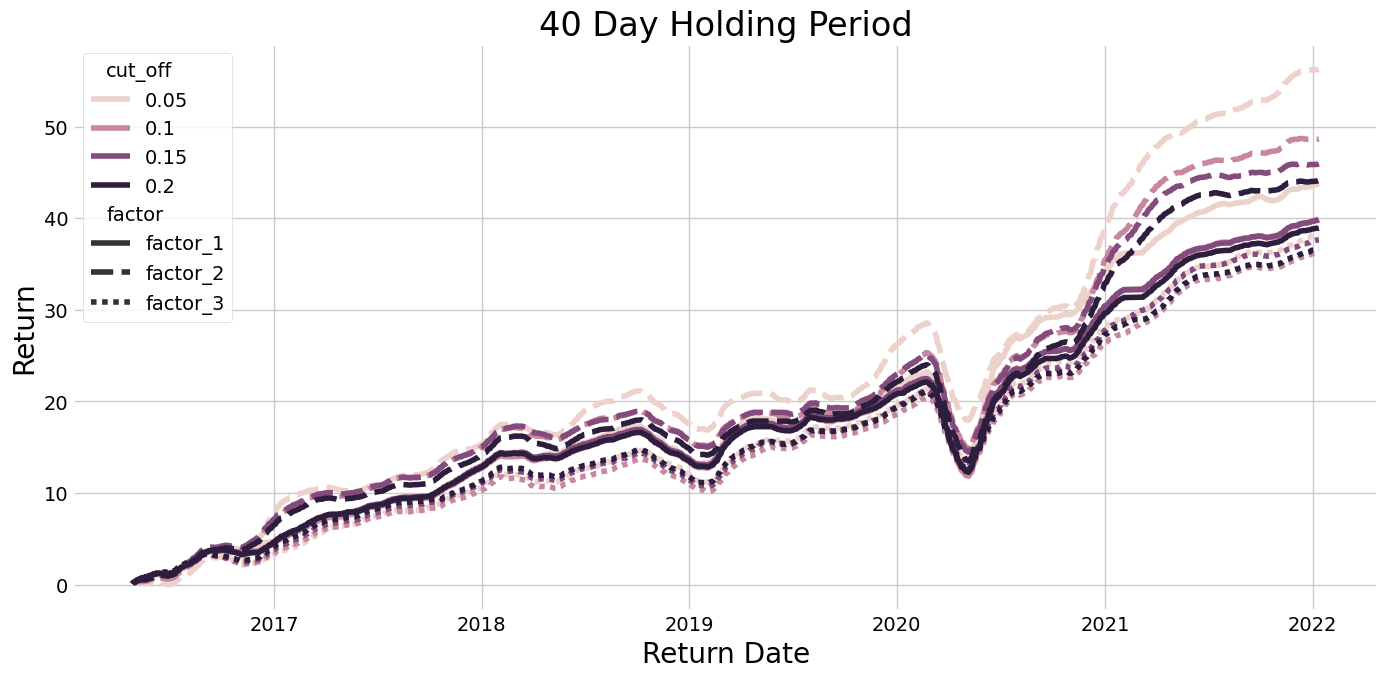

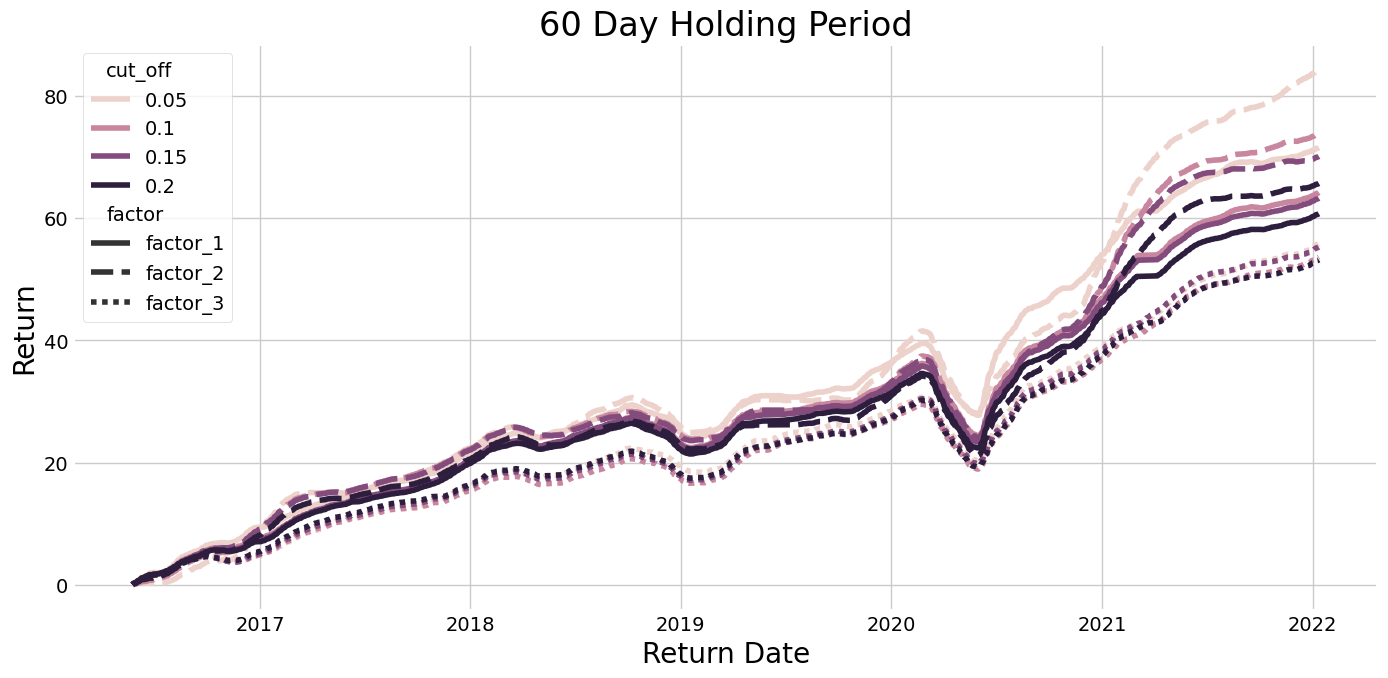

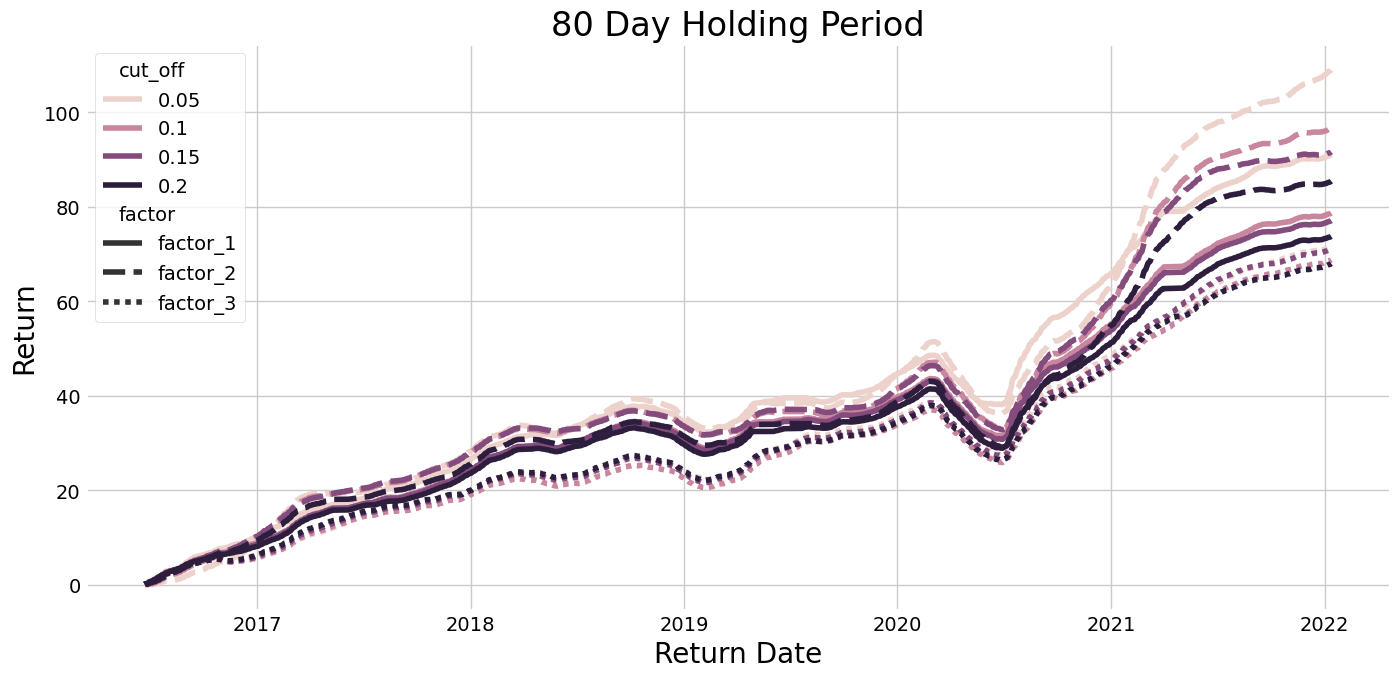

In [11]:
holding_periods = df.holding_period.unique()
for p in holding_periods:
    plot_holding_period_returns(df, p)